# 붓꽃 데이터로 PCA 변환을 위한 데이터 로딩 및 시각화

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

# 넘파이 데이터 셋을 pandas DF로 변환
# 각 특성에 해당하는 컬럼명을 정
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns) # iris 데이터의 특성을 DataFrame으로 변환
irisDF['target']=iris.target  # iris 데이터의 타겟값을 DataFrame에 추가
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


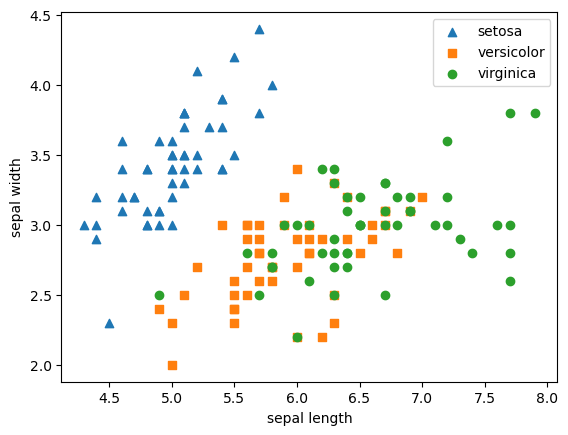

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    # irisDF에서 해당 타겟값에 해당하는 데이터만 추출하여 x, y 축 데이터로 사용
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### 평균이 0, 분산 1인 정규분포로 원본 데이터 반환

In [4]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다.
# PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [5]:
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### PCA 변환 수행

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2) # PCA 객체를 생성하고 주성분 개수를 2로 설정.

In [8]:
pca.fit(iris_scaled) # PCA 객체에 데이터를 fitting
iris_pca = pca.transform(iris_scaled) # PCA를 통해 주어진 데이터셋을 변환
print(iris_pca.shape)

(150, 2)


In [9]:
iris.data.shape

(150, 4)

In [10]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [11]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


### PCA로 차원 축소된 피처들로 데이터 산포도 시각화

In [12]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

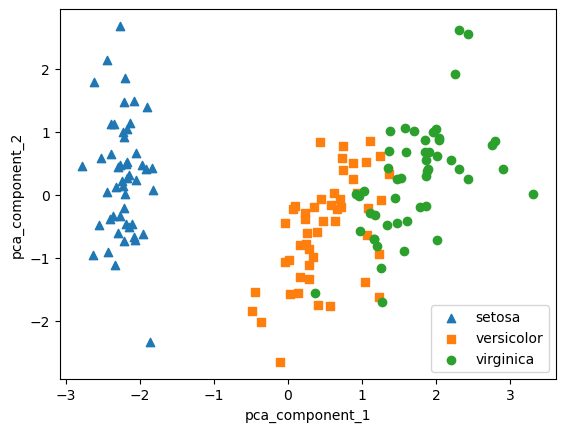

In [14]:
# pca_comopnent_1을 x축, pca_component_2를 y축으로 scatter plot 수행.

for i, marker in enumerate(markers):
    x_axis_data2 = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data2 = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data2, y_axis_data2, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

### 각 PCA Component별 변동성 비율

In [16]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

### 4개 컬럼을 사용했을 때

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [19]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores_pca)
print('원본 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
원본 데이터 평균 정확도: 0.88


### 붓꽃 데이터로 LDA 변환을 위한 데이터 로딩 및 시각화

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# fit()호출 시 target값 입력
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


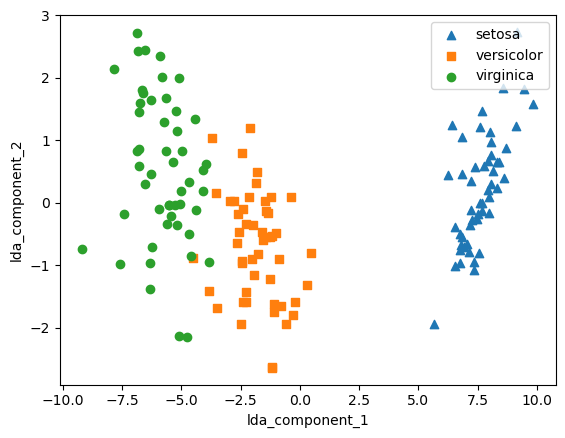

In [22]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data3 = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data3 = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data3, y_axis_data3, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

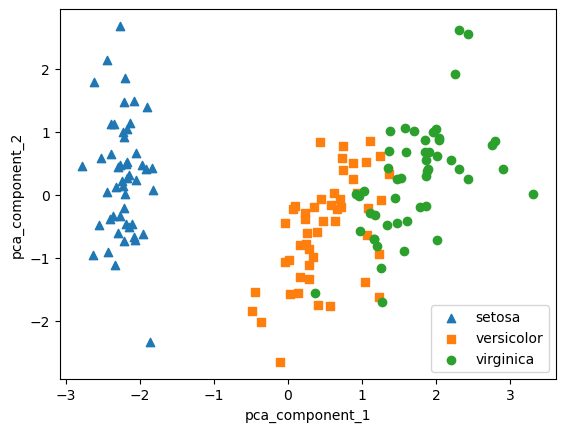

In [23]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data2 = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data2 = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data2, y_axis_data2, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

### 군집화

In [42]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set(font_scale=1)
# 맑은 고딕으로 글꼴 설정하기
plt.rc('font', family='Malgun Gothic') 
# 마이너스 기호 문제 해결하기
mpl.rcParams['axes.unicode_minus'] = False

분류 대 군집

In [43]:
data = load_iris()
X=data.data
y=data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

아래 코드는 분류와 군집화의 차이를 보여주는 그림을 그린다.

- 왼편: 각 샘플이 속하는 품종에 따른 분류
- 오른편: 지정된 기준에 따라 비슷한 샘플들끼리 그룹짓기

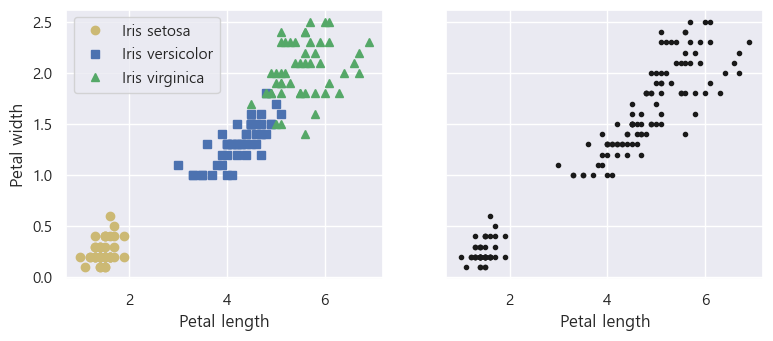

In [44]:
plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label = 'Iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label = 'Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label = 'Iris virginica')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid(True)
plt.show()

## 1. K-means
먼저 2,000개의 데이터 샘플을 생성한다. 생성되는 데이터는 지정된 5개의 센터를 중심으로 지정된 표준편차를 따르는 원 모양의 데이터 군집을 이룬다. 또한 각각의 군집은 거의 동일한 크기를 갖는다.

In [45]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]]) # 각 데이터셋의 중심점
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) # 데이터셋의 표준편차
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

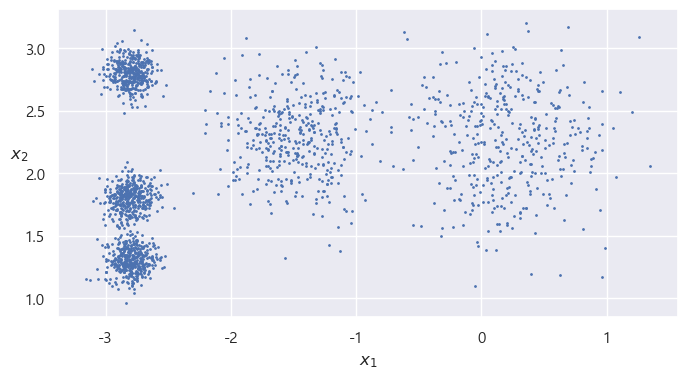

In [46]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid(True)
plt.show()

In [47]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [48]:
y_pred

array([2, 2, 4, ..., 1, 4, 2])

In [49]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [50]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5], [ 0, 10]])
kmeans.predict(X_new)

array([0, 4, 1, 1, 4])

**보로노이 다이어그램**

군집을 나누는 결정경계를 그리면 보로노이 다이어그램이 생성된다.

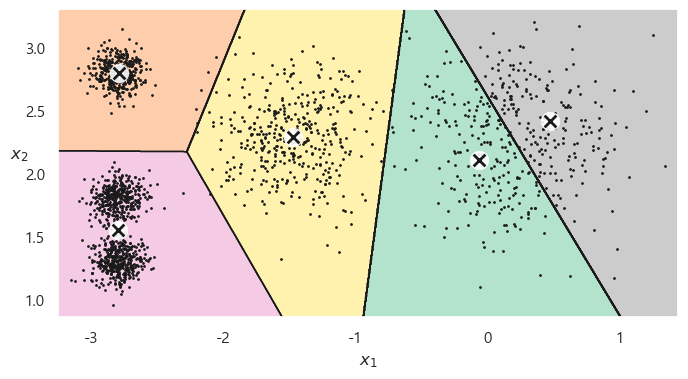

In [51]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # 바탕 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    # 결정 경계 그리기
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    # 훈련 데이터셋과 센트로이드 그리기
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

### 실루엣 점수와 군집수
아래 코드는 군집수가 증가할 때 실루엣 점수의 변화를 보여준다.

In [73]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6267891051050735

In [74]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)] # 군집 수 1~10인 kmeans

C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\c

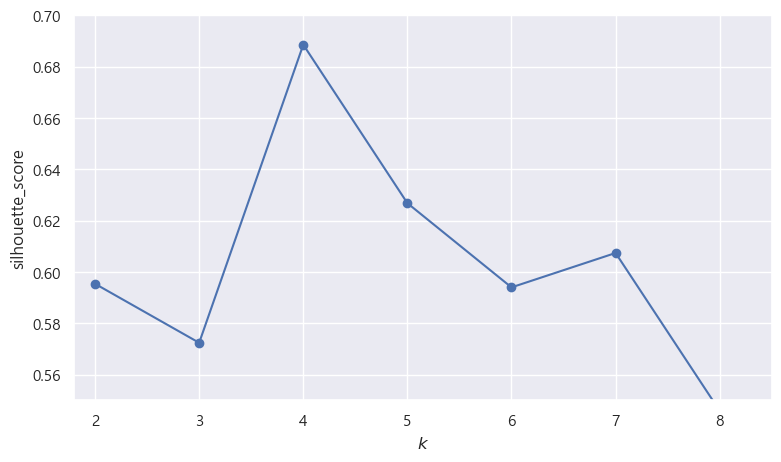

In [75]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]] # 군집 수 1~10에 따른 실루엣 점수 저장

plt.figure(figsize=(9,5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("silhouette_score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid(True)

plt.show()

실루엣 다이어그램과 군집수

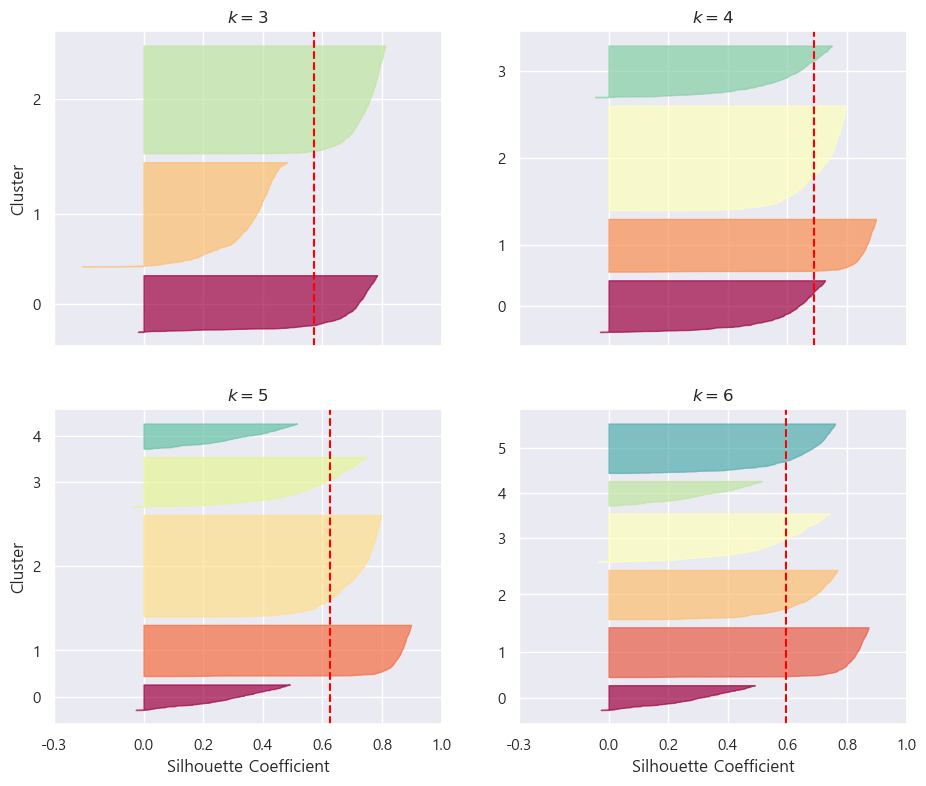

In [76]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_xticks([-0.3, 0, 0.2, 0.4, 0.6, 0.8, 1])

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

# save_fig("silhouette_analysis_plot")
plt.show()

## 2. Hieararchical Clustering

In [77]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

data=pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

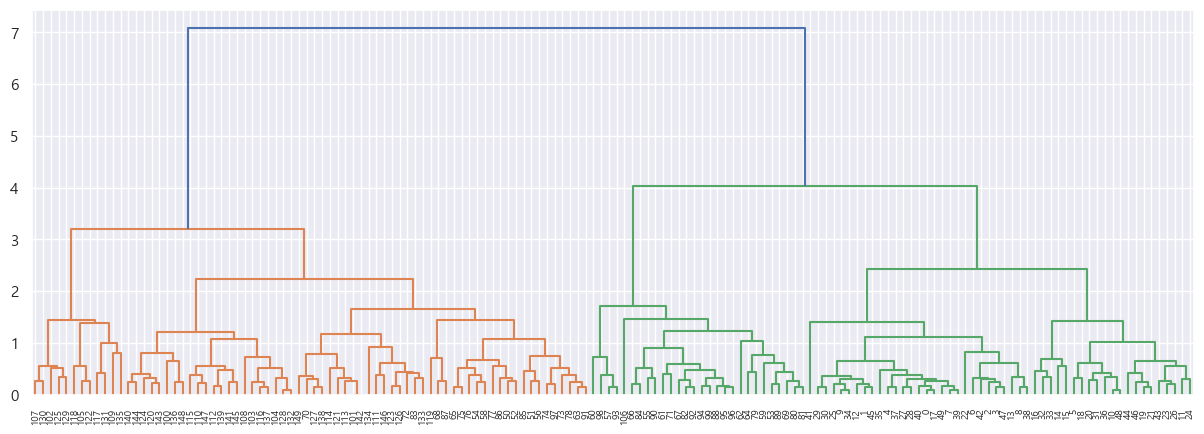

In [85]:
from scipy.cluster.hierarchy import linkage, dendrogram

#Calculate the linkage: mergings
mergings = linkage(data, method='complete')

# plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,5))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=7)
plt.show()

In [86]:
from scipy.cluster.hierarchy import cut_tree
y_km = cut_tree(mergings, 10)
y_km

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [2],
       [2],
       [3],
       [2],
       [3],
       [2],
       [4],
       [2],
       [3],
       [4],
       [3],
       [3],
       [2],
       [3],
       [2],
       [3],
       [3],
       [2],
       [3],
       [5],
       [3],
       [5],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
    

## 3. DBSCAN

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

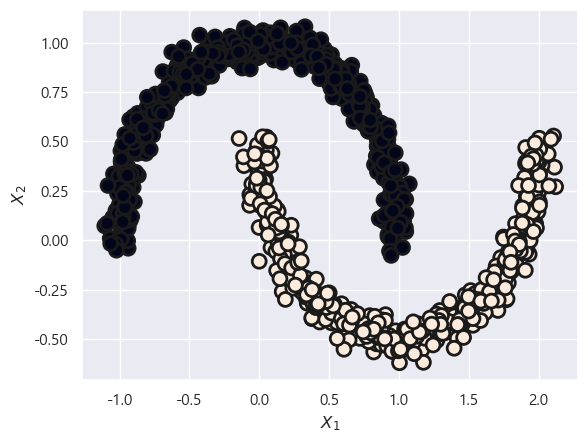

In [88]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolors="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [89]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [90]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [91]:
# 코어포인트의 인덱스
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [92]:
# 코어데이터 목록
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

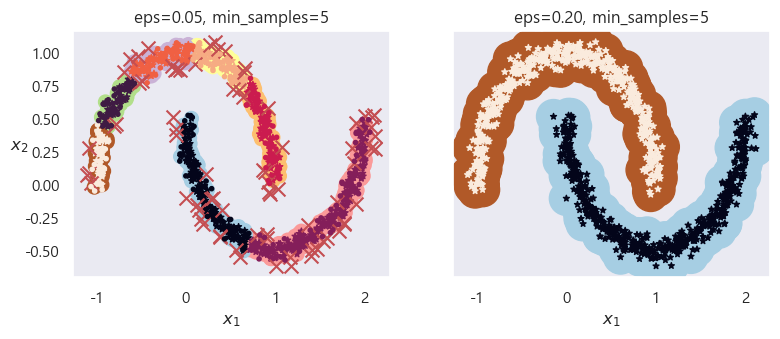

In [93]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()

## 4. Guassian Mixture Model

꽃잎 길이와 너비만으로는 두 개의 군집으로만 구분이 가능해 보인다. 하지만 꽃잎의 길이와 너비와 더불어 꽃받침의 길이와 너비까지 포함한 네 개의 특성을 모두 사용하여 후반부에서 가우시안 혼합 모델을 이용하여 세 개의 군집으로 나눌 수 있다.

In [94]:
from sklearn.datasets import load_iris

data=load_iris()
X=data.data
y=data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


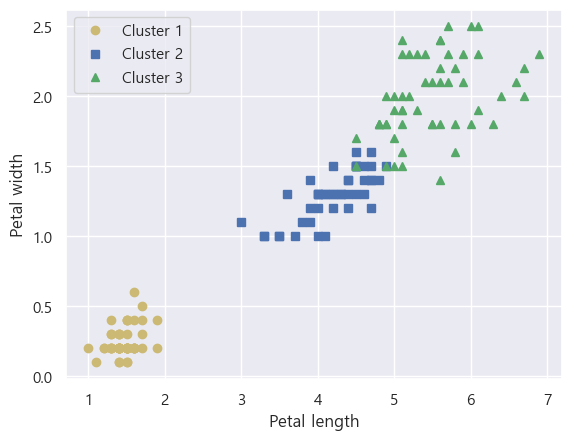

In [96]:
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):                   # 품종 아이디: 0, 1, 2
    mode, _ = stats.mode(y_pred[y==class_id])   # mode: 지정된 품종이 가장 많이 포함된 군집 인덱스
    mapping[mode] = class_id                 # 군집 인덱스와 품종 연결 # mode[0] --> mode

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [97]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
(y_pred==y).sum() / len(y_pred)

0.9666666666666667

# 실습

In [99]:
import pandas as pd
middle1_score_df = pd.read_csv('.csv',index_col=0)

In [101]:
input_data = score_df[['']].dropna()

In [102]:
pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(input_data)
score_pca = pca.transform(input_data)
print(score_pca.shape)

(351, 2)


In [103]:
print(pca.explained_variance_ratio_)

[0.52882125 0.1496732 ]


In [104]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
scoreDF_pca = pd.DataFrame(score_pca, columns=pca_columns)
scoreDF_pca.head(3)

,pca_component_1,pca_component_2
0,37.776471,17.448316
1,51.757373,0.920640
2,-21.036371,48.266700


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


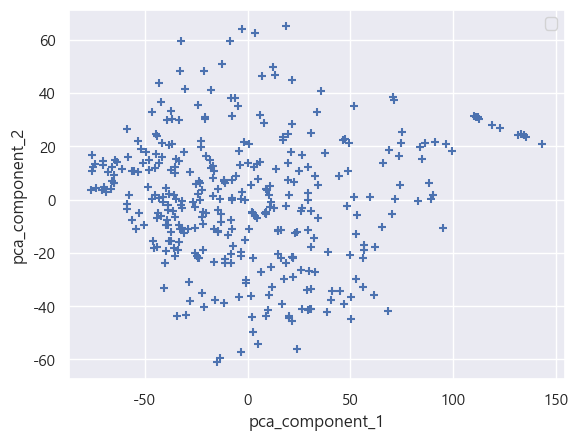

In [106]:
x_axis_data = scoreDF_pca['pca_component_1']
y_axis_data = scoreDF_pca['pca_component_2']
plt.scatter(x_axis_data, y_axis_data, marker='+')

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [107]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(scoreDF_pca)

scoreDF_pca['gmm_cluster'] = gmm_labels

C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


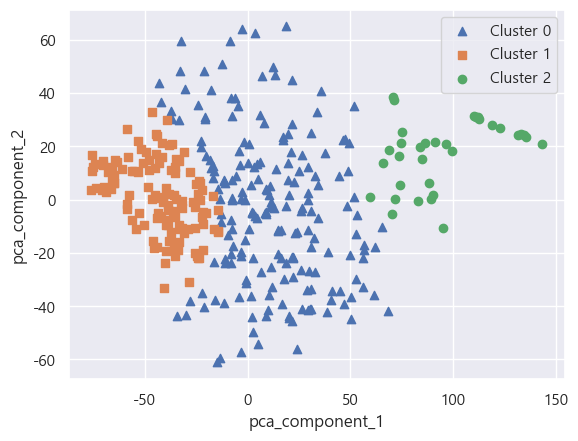

In [117]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_1']
    y_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f'Cluster {i}')

plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()
plt.show()